In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# data loading
data = pd.read_csv("./articulos_ml.csv")

# mostrar registros y dimensiones
data.shape

(161, 8)

In [5]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [6]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


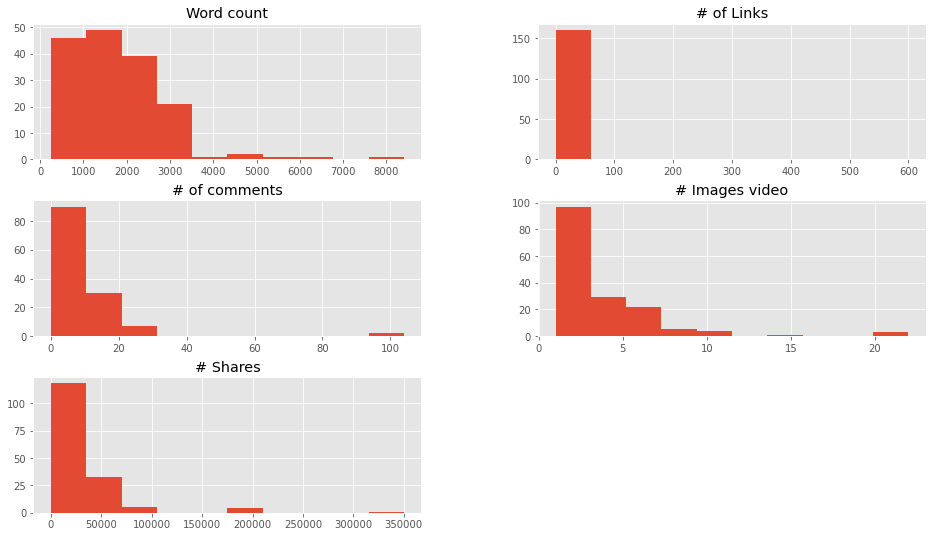

In [8]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()


In [11]:
data.corr()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
Word count,1.000000,0.346730,0.108730,0.463767,-0.167361,0.141736
# of Links,0.346730,1.000000,0.116415,0.021087,0.059157,0.288325
# of comments,0.108730,0.116415,1.000000,0.018377,0.279116,0.437413
# Images video,0.463767,0.021087,0.018377,1.000000,0.209958,0.062170
Elapsed days,-0.167361,0.059157,0.279116,0.209958,1.000000,0.325343
# Shares,0.141736,0.288325,0.437413,0.062170,0.325343,1.000000


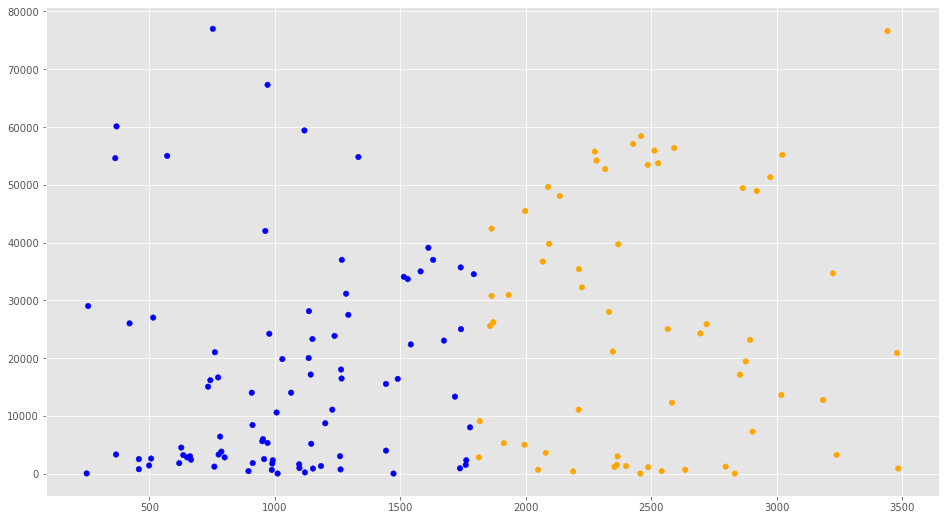

In [16]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000

filtered_data = data[ (data['Word count'] <= 3500) & (data['# Shares'] <= 80000) ]
 
colors=['orange', 'blue']
sizes=[30, 60]
 
wordsFiltered = filtered_data['Word count'].values
sharesFiltered = filtered_data['# Shares'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]

for index, row in filtered_data.iterrows():
    if(row['Word count'] > 1808):
        asignar.append(colors[0])
    else:
        asignar.append(colors[1])
    
plt.scatter(wordsFiltered, sharesFiltered, c=asignar, s=sizes[0])
plt.show()

In [18]:
dataX = filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values
 
# Creamos el objeto de Regresión Linear
modelo = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
modelo.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = modelo.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', modelo.coef_)

# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', modelo.intercept_)

# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


In [19]:
#Vamos a comprobar:

# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:

y_Dosmil = regr.predict([[2000]])

print(int(y_Dosmil))

22595
